In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Testing the projections

In [174]:
def project_onto_circle(x, y):
    if x**2 + y**2 <= 1.5:
        x_new = x
        y_new = y
    else:
        D = np.sqrt(x**2 + y**2)
        x_new = (x * np.sqrt(1.5)) /  D
        y_new = (y * np.sqrt(1.5)) /  D
    return x_new, y_new

def project_onto_square(x, y):
    if abs(x) < 1 and abs(y) < 1:
        new_x, new_y = x, y
    elif abs(x) > 1:
        if abs(y) > 1:
            new_x, new_y =  x/abs(x), y/abs(y)
        else:
            new_x, new_y = x/abs(x), y
    else:
        new_x, new_y = x, y/abs(y)
    return new_x, new_y

def project_onto_triangle(x, y):
    if x >= -1 and x <= 1.5 and y < -1:
        new_x, new_y = x, -1
    elif y >= -1 and y <= 1.5 and x < -1:
        new_x, new_y = -1, y
    elif  x < -1 and y < -1:
        new_x, new_y = -1, -1
    elif x > 1.5 and y < x - 2.5:
        new_x, new_y = 1.5, -1
    elif x < y - 2.5 and y > 1.5:
        new_x, new_y = -1, 1.5
    elif x >= -1 and x <= -y + 0.5 and y >= -1 and y <= -x + 0.5:
        new_x, new_y = x, y
    else:
        new_x, new_y = (x - y + 0.5) / 2, -((x - y + 0.5) / 2) + 0.5
    return new_x, new_y

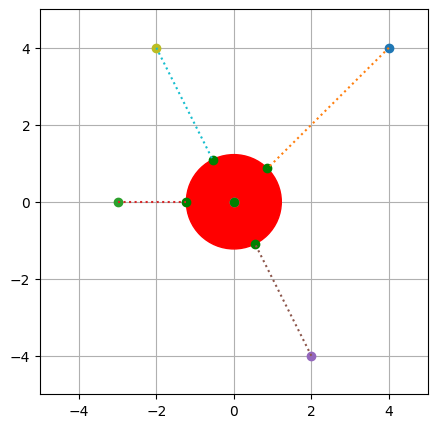

In [68]:
circle1 = plt.Circle((0, 0), np.sqrt(1.5), color='r')

fig, ax = plt.subplots()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
fig.set_figwidth(5)
fig.set_figheight(5)
points = [(4,4), (-3,0), (2,-4), (0,0), (-2,4)]
for point in points:
    projected_point = project_onto_circle(*point)
    ax.plot(*point, "o")
    ax.plot(* projected_point, "go")
    ax.plot(*zip(point, projected_point), linestyle="dotted")
ax.grid(True)
ax.set_axisbelow(True)
ax.add_patch(circle1)


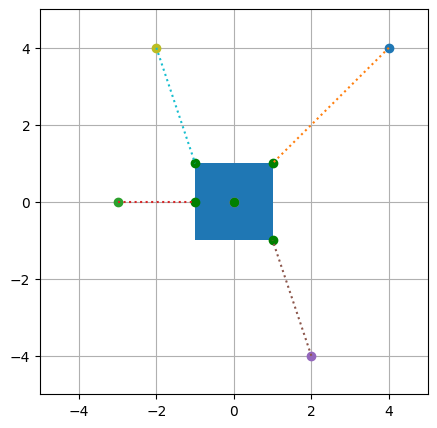

In [67]:
square = plt.Rectangle((-1,-1), 2, 2)
fig, ax = plt.subplots()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
fig.set_figwidth(5)
fig.set_figheight(5)
points = [(4,4), (-3,0), (2,-4), (0,0), (-2,4)]
for point in points:
    projected_point = project_onto_square(*point)
    ax.plot(*point, "o")
    ax.plot(* projected_point, "go")
    ax.plot(*zip(point, projected_point), linestyle="dotted")
ax.grid(True)
ax.set_axisbelow(True)
ax.add_patch(square)

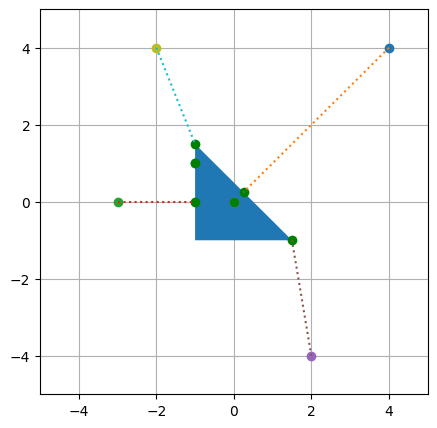

In [175]:
square = plt.Polygon([(-1,-1), (1.5,-1), (-1, 1.5)])
fig, ax = plt.subplots()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
fig.set_figwidth(5)
fig.set_figheight(5)
points = [(4,4), (-3,0), (2,-4), (0,0), (-2,4), (-1,1)]
for point in points:
    projected_point = project_onto_triangle(*point)
    ax.plot(*point, "o")
    ax.plot(* projected_point, "go")
    ax.plot(*zip(point, projected_point), linestyle="dotted")
ax.grid(True)
ax.set_axisbelow(True)
ax.add_patch(square)

In [98]:
def gradient_descent(point, gamma, gradient, n_iter=1):
    p = point
    points = []
    for _ in range(n_iter):
        p = p -gamma * gradient(*p)
        points.append(p)
    return p, points

Testing the algorithm on the already computed examples

In [100]:
def grad(x, y):
    return np.array([2*x, 4*y])
def fun(x, y):
    return x**2 + 2*y**2
starting_point = [1, 1]
print(gradient_descent(starting_point, 5/18, grad, 5)) #CORRECT RESULT
print(gradient_descent(starting_point, 3/10, grad)) #CORRECT RESULT
print(fun(*gradient_descent(starting_point, 5/18, grad)[0])) #CORRECT RESULT

(array([ 1.73415299e-02, -1.69350878e-05]), [array([ 0.44444444, -0.11111111]), array([0.19753086, 0.01234568]), array([ 0.0877915 , -0.00137174]), array([0.03901844, 0.00015242]), array([ 1.73415299e-02, -1.69350878e-05])])
(array([ 0.4, -0.2]), [array([ 0.4, -0.2])])
0.22222222222222224


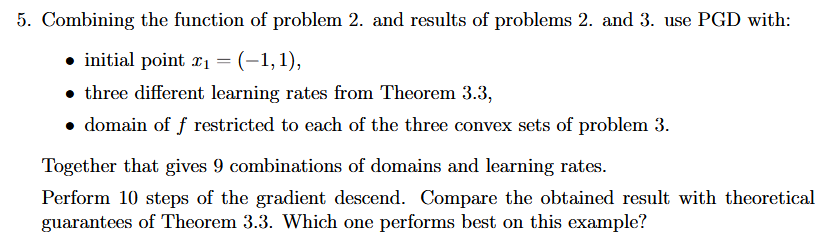

In [149]:
def projected_gradient_descent(point, gamma, gradient, projection, n_iter=1):
    p = projection(*point)
    points = []
    points.append(p)
    for _ in range(n_iter):
        p = projection(*(p -gamma * gradient(*p)))
        points.append(p)
    return p, points

In [209]:
def projected_gradient_descent_adaptive_gamma(point, alpha, gradient, projection, n_iter=1):
    p = projection(*point)
    points = []
    points.append(p)
    for i in range(n_iter):
        gamma = 2/(alpha*(i+2))
        p = projection(*(p -gamma * gradient(*p)))
        points.append(p)
    return p, points

In [102]:
def func(x, y):
    return x**2 + np.e**x + y**2 -x*y

def grad_func(x, y):
    return np.array([2*x + np.e**x - y, 2*y -x])


In [150]:
beta = 9.522
finish, points = projected_gradient_descent(np.array([-1, 1]), 1/beta, grad_func, project_onto_circle, 10)
print(finish)

(-0.3573714870585367, -0.09058593448247548)


In [204]:
shape_pairs = [(project_onto_circle, plt.Circle((0, 0), np.sqrt(1.5), color='r', ec="black", fc="none", ls="--")),
               (project_onto_square, plt.Rectangle((-1,-1), 2, 2, color='r', ec="black", fc="none", ls="--")),
               (project_onto_triangle, plt.Polygon([(-1,-1), (1.5,-1), (-1, 1.5)], color='r', ec="black", fc="none", ls="--"))]

(-0.3573714870585367, -0.09058593448247548)
(-0.3556857004787623, -0.08413373650778726)
(-0.3556857004787623, -0.08413373650778726)


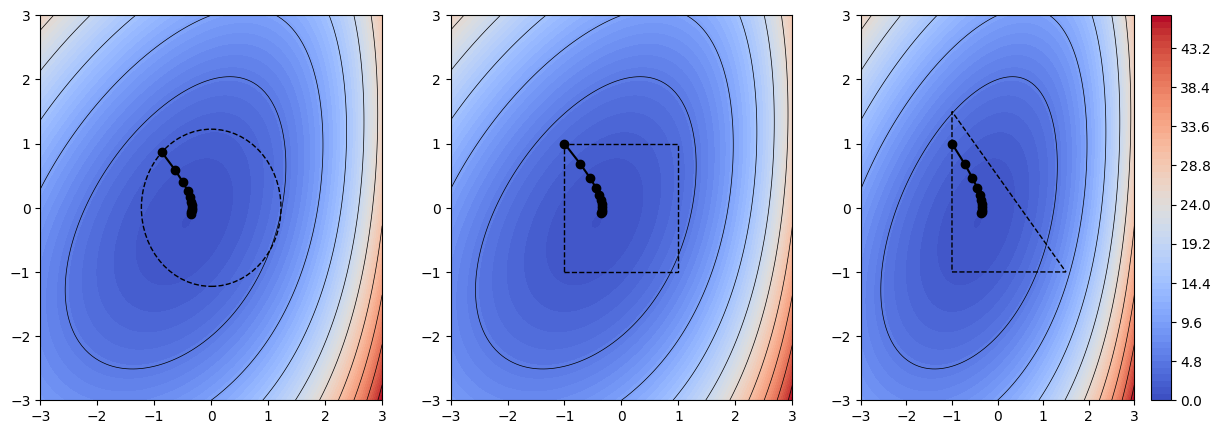

In [216]:
import copy
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
contour = plt.contourf(X, Y, Z, levels=60, cmap="coolwarm")
fig.colorbar(contour)
for i, sp in enumerate(shape_pairs):
    ax[i].contourf(X, Y, Z, levels=60, cmap="coolwarm")
    finish, points = projected_gradient_descent(np.array([-1, 1]), 1/beta, grad_func, sp[0], 10)
    print(finish)
    ax[i].contour(X, Y, Z, levels=10, colors="black", linewidths=0.5)
    ax[i].add_patch(copy.copy(sp[1]))
    ax[i].set_xlim(-3,3)
    for point in points:
        ax[i].plot(*point, "o", c="black")
    ax[i].plot(*zip(*points), "-", c="black", markersize=4, label="Projected Descent Path")


In [196]:
alpha = 1.065
finish, points = projected_gradient_descent_adaptive_gamma(np.array([-1, 1]), alpha, grad_func, project_onto_circle, 10)
print(finish)

(-0.43408650563727874, -0.2183878394093698)


(-0.43408650563727874, -0.2183878394093698)
(-0.4276847423525164, -0.20957685449681393)
(-0.425556700794344, -0.20664283135442257)


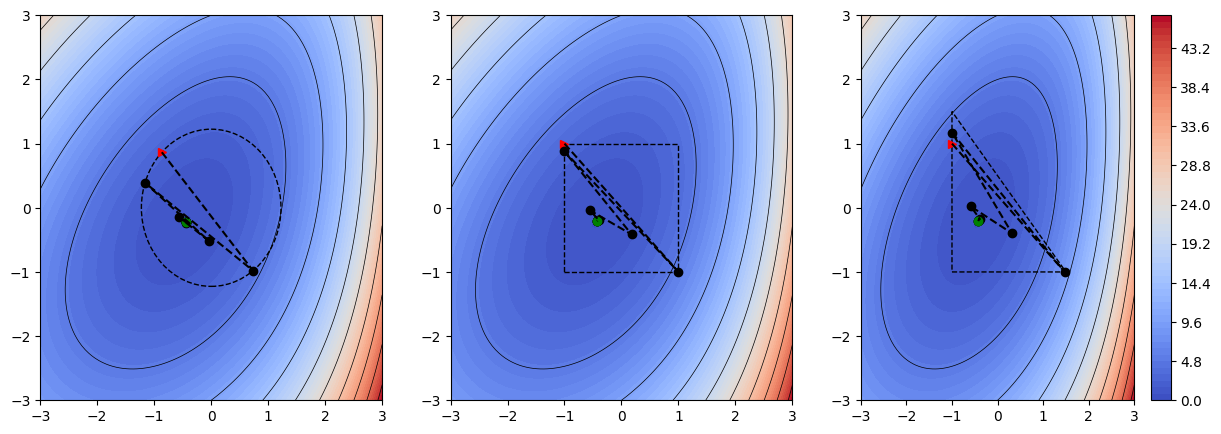

In [ ]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
contour = plt.contourf(X, Y, Z, levels=60, cmap="coolwarm")
fig.colorbar(contour)
for i, sp in enumerate(shape_pairs):
    ax[i].contourf(X, Y, Z, levels=60, cmap="coolwarm")
    finish, points = projected_gradient_descent_adaptive_gamma(np.array([-1, 1]), alpha, grad_func, sp[0], 10)
    print(finish)
    ax[i].contour(X, Y, Z, levels=10, colors="black", linewidths=0.5)
    ax[i].add_patch(copy.copy(sp[1])) #it is weird to me that this is even necessary
    ax[i].set_xlim(-3,3)
    ax[i].plot(*points[0], ">r")
    for point in points[1:len(points)-1]:
        ax[i].plot(*point, "o", c="black")
    ax[i].plot(*points[-1], "og")
    ax[i].plot(*zip(*points), "--", c="yellow", markersize=4, label="Projected Descent Path")